In [2]:
import pandas as pd

In [21]:
df1 = pd.read_csv('~/Desktop/fct_invoice.csv')
df2 = pd.read_json('~/Desktop/dim_customer.json')

df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [22]:
# Easy Questions
# 1. How many unique customers are in the dataset?

df1['customer_id'].nunique()

5191

In [23]:
# 2a What are the different categories of products available? 

df1['category'].unique().tolist()


['Clothing',
 'Shoes',
 'Books',
 'Cosmetics',
 'Food & Beverage',
 'Toys',
 'Technology',
 'Souvenir']

In [24]:
# 2 How many unique categories are there?

df1['category'].nunique()

8

In [25]:
# 3a. Which payment method is the most popular? How many times was it used? CHECK AGAIN

df1['payment_method'].mode()

0    Cash
Name: payment_method, dtype: object

In [26]:
import pandas as pd

df1 = pd.read_csv('~/Desktop/fct_invoice.csv')

df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [27]:
# 3b. How many times was it used?


s = df1['payment_method'] == 'Cash'

s.sum()

44447

In [28]:
# Medium Questions
# 1. What are the three most popular categories, by total sales?

df1['total_price'] = df1['price'] * df1['quantity']

df1.groupby(['category'])['total_price'].sum().nlargest(3)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_price, dtype: float64

In [29]:
# Merging df1 and df 2 into one df

df_merged = pd.concat([df1, df2], ignore_index=True, sort=False)

df_merged

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,age,first_name,gender,id,last_name
0,I138884,229.0,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,NaN,NaN,NaN,NaN
1,I317333,3433.0,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,NaN,NaN,NaN,NaN,NaN
2,I127801,644.0,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity,300.08,NaN,NaN,NaN,NaN,NaN
3,I173702,4900.0,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,NaN,NaN,NaN,NaN,NaN
4,I337046,1089.0,Books,4.0,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arthur,M,9428.0,Harris
104644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David,M,9494.0,Roy
104645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,Thomas,M,10350.0,Turner
104646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,F,10587.0,Sanchez


In [3]:
# 2. What are the total sales attributed to customers over the age of 45?

import pandas as pd

df1 = pd.read_csv('~/Desktop/fct_invoice.csv')
df2 = pd.read_json('~/Desktop/dim_customer.json')

df_merged = pd.merge(df1, df2, left_on='customer_id', right_on='id', how='inner')

df_merged['total'] = df_merged['price'] * df_merged['quantity']

over_45 = df_merged['age'] > 45
sales_over_45 = df_merged[over_45]['total'].sum()

sales_over_45

82039768.15

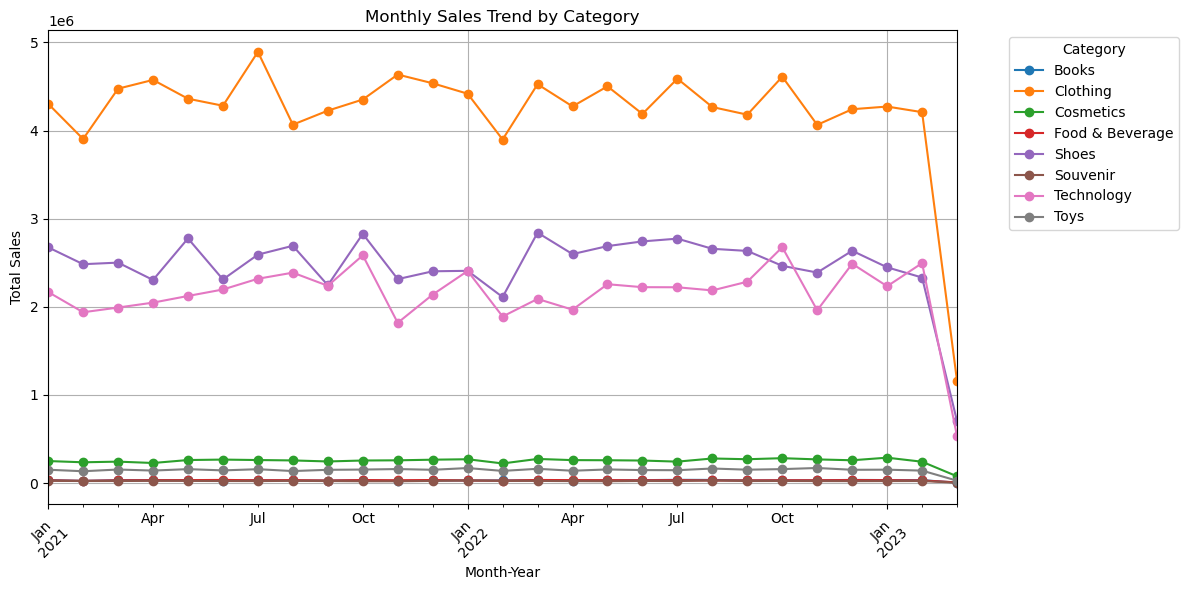

There are no seasonal trends or patterns.


In [4]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import pandas as pd
import matplotlib.pyplot as plt

df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d/%m/%Y')

df1['month_year'] = df1['invoice_date'].dt.to_period('M')

df1['sales'] = df1['price'] * df1['quantity']

grouped = df1.groupby(['month_year', 'category'])['sales'].sum().unstack()

grouped.index = grouped.index.to_timestamp()
grouped.plot(figsize=(12, 6), marker='o')

plt.title("Monthly Sales Trend by Category")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('There are no seasonal trends or patterns.')

In [6]:
# Hard Questions
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import pandas as pd

df1 = pd.read_csv('~/Desktop/fct_invoice.csv')
df2 = pd.read_json('~/Desktop/dim_customer.json')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pt_data = pd.merge(df1, df2, left_on='customer_id', right_on='id', how='outer')

pt_data['total_sales'] = pt_data['price'] * pt_data['quantity']

pt_data['decade_age_range'] = pd.cut(
    pt_data['age'], right = False, 
    bins=range(0, 101, 10),
    labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
)

final_pivot = pd.pivot_table(
    pt_data,
    values='total_sales',
    index=['category', 'decade_age_range'],
    aggfunc=['sum', 'mean'],  
    observed=False
)

final_pivot

sum          mean
                                  total_sales   total_sales
category        decade_age_range                           
Books           0-9                      0.00           NaN
                10-19                12801.75    170.690000
                20-29                79461.75    167.287895
                30-39                84143.10    165.962722
                40-49                87203.40    170.987059
                50-59                74962.20    162.255844
                60-69                80476.80    172.696996
                70-79                54827.85    156.204701
                80-89                26664.00    153.241379
                90-99                    0.00           NaN
Clothing        0-9                      0.00           NaN
                10-19              1927413.84   3423.470409
                20-29             10250732.80   3235.711111
                30-39             11354126.96   3350.288274
                40-49             11215189.92   3291.808019
                50-59             10321851.76   3345.819047
                60-69             10660642.08   3280.197563
                70-79              7769371.28   3307.522895
                80-89              4493698.00   3301.761940
                90-99                    0.00           NaN
Cosmetics       0-9                      0.00           NaN
                10-19               109619.36    466.465362
                20-29               605915.32    447.169978
                30-39               723544.70    442.264487
                40-49               665034.96    447.232656
                50-59               587780.96    442.273108
                60-69               649990.76    451.069230
                70-79               419082.62    444.886008
                80-89               254531.60    427.066443
                90-99                    0.00           NaN
Food & Beverage 0-9                      0.00           NaN
                10-19                13582.31     60.365822
                20-29                73491.96     54.763010
                30-39                87246.86     57.932842
                40-49                89553.29     57.149515
                50-59                72425.04     55.668747
                60-69                80976.09     56.626636
                70-79                55050.98     57.887466
                80-89                31332.93     56.455730
                90-99                    0.00           NaN
Shoes           0-9                      0.00           NaN
                10-19               993281.35   6492.034967
                20-29              5924878.24   6568.601153
                30-39              7200839.66   7045.831370
                40-49              7025590.02   6801.152004
                50-59              5852857.84   6688.980389
                60-69              5978893.54   6763.454231
                70-79              4480269.05   6627.616938
                80-89              2628744.60   6917.748947
                90-99                    0.00           NaN
Souvenir        0-9                      0.00           NaN
                10-19                12375.15    137.501667
                20-29                54943.32    121.287682
                30-39                64092.72    128.700241
                40-49                66391.80    134.124848
                50-59                54943.32    128.974930
                60-69                55025.43    123.652652
                70-79                38673.81    127.216480
                80-89                23718.06    126.159894
                90-99                    0.00           NaN
Technology      0-9                      0.00           NaN
                10-19              1129800.00  13291.764706
                20-29              5261550.00  11488.100437
                30-39              6159300.00  11665.340909
                40-49 